<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_p_157_184.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 훈련

## 4.1 선형 회귀

### 식 4-1 선형 회귀 모델의 예측

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

- $\hat{y}$ : 예측값  
- $n$ : 특성의 수  
- $x_i$ : $i$번째 특성값  
- $\theta_i$ : $i$번째 모델 파라미터 (편향 $\theta_0$ 및 특성의 가중치 $\theta_1, \theta_2, \dots, \theta_n$ 포함)



### 식 4-2 선형 회귀 모델의 예측 (벡터 형태)

$$
\hat{y} = h_\theta(x) = \theta^T x
$$

- $\theta$ : 편향 $\theta_0$과 $x_1, x_2, \dots, \theta_n$ 특성 가중치를 담은 모델의 파라미터 벡터  
- $x$ : 샘플의 특성 벡터 ($x = [1, x_1, x_2, \dots, x_n]$)  
- $\theta^T x$ : 벡터 $\theta$와 $x$의 점곱으로, 이는 $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$와 같습니다.  
- $h_\theta(x)$ : 모델 파라미터를 사용한 가설 (hypothesis) 함수


- 회귀에 널리 사용되는 성능 측정 지표 : RMSE

=> RMSE(MSE)를 최소화하는 $\theta$를 찾아야 함


### 식 4-3 선형 회귀 모델의 MSE 비용 함수

$$
MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T x^{(i)} - y^{(i)} \right)^2
$$

- $m$ : 샘플의 수  
- $\theta^T x^{(i)}$ : 모델의 예측값 (세타 벡터와 특성 벡터의 점곱)  
- $y^{(i)}$ : 실제 값


## 4.1.1 정규방정식

### 식 4-4 정규방정식

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

- $\hat{\theta}$ : 비용 함수를 최소화하는 $\theta$ 값

- $X$ : 특성 행렬  
- $y$ : 실제 값 벡터


In [ ]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [ ]:
X_b=np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1 추가
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 정규방정식을 사용해 계산
- 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를 사용해 역행렬을 계산하고 dot()을 사용해 행렬 곱셈 진행
- 사용한 함수 : $y = 4 + 3x + \text{가우시안 잡음}$


In [ ]:
theta_best

array([[4.0161073 ],
       [2.79098808]])

- $\theta_0 = 4$, $\theta_1 = 3$와 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함


- $\hat{\theta}$을 사용해 예측

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 모든 샘플에 x0=1 추가
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.0161073 ],
       [9.59808347]])

In [ ]:
import matplotlib.pyplot as plt

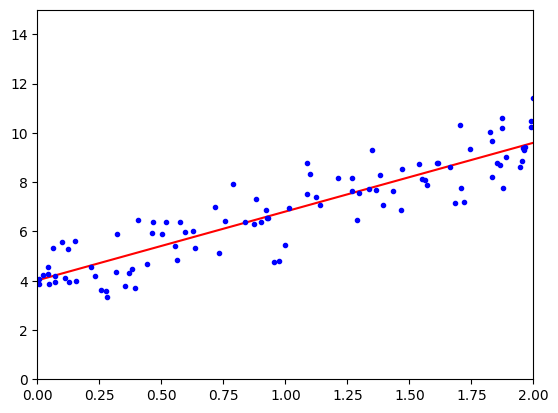

In [ ]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

- 사이킷런에서 선형 회귀 수행

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
lin_reg.intercept_,lin_reg.coef_ # 가중치, 편향 계산

(array([4.0161073]), array([[2.79098808]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.0161073 ],
       [9.59808347]])

- np.linalg.lstsq() : $\theta = X^+ y$을 계산
- $X^+$ : $X$의 유사역행렬(pseudo-inverse)

In [ ]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.0161073 ],
       [2.79098808]])

- np.linalg.pinv() : 유사역행렬 직접 계산 가능

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.0161073 ],
       [2.79098808]])

- 유사역행렬 -> 특잇값 분해 사용해 계산
 - SVD : 훈련 세트 행렬 $X$= $U \Sigma V^T$로 분해
 - 유사역행렬 : $X^+ = V \Sigma^+ U^T$

- ($\Sigma^+$ 계산 과정)

알고리즘이 $\Sigma$ 계산 -> 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈. 그 후 0이 아닌 모든 값을 역수로 치환 -> 마지막으로 만들어진 행렬을 전치-> $\Sigma^+$

- 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적. 실제로 $m < n$이거나 어떤 특성이 중복되어 행렬 $X^T X$의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않지만 유사역행렬은 항상 구할 수 있음

## 4.1.2 계산 복잡도

- 정규방정식 : $(n+1) \times (n+1)$ 크기의 $X^T X$의 역행렬을 계산($n$은 특성 수).     
 - 역행렬을 계산하는 계산 복잡도 : 일반적으로 $O(n^{2.4})$ ~ $O(n^3)$ 사이입니다 (구현 방법에 따라 차이가 있습니다).
 - 사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법 : $O(n^2)$ -> 특성 수가 두 배로 늘어나면(n=2) 계산 시간이 대략 4배 증가.


## 4.2 경사 하강법

- 경사하강법(GD) : 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터 $\theta$를 조정해가는 것(gradient가 감소하는 방향으로)

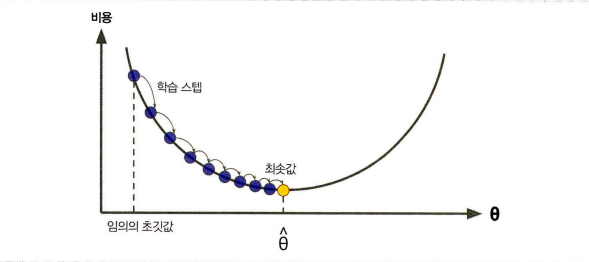

(그림 설명)

학습 스텝의 크기 ∝ 비용 함수의 기울기 -> $\theta$가 ↓, 스텝 크기(학습률) ↓

-  학습률은 너무 작아도, 너무 커도 안됨. 적절한 학습률을 찾아야 함

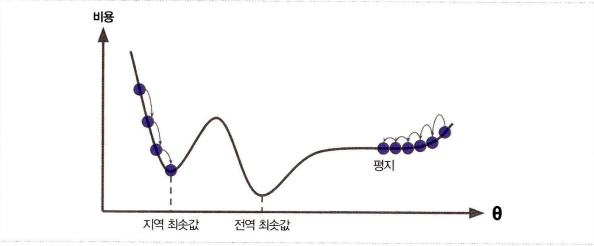

<경사 하강법의 문제점>

(왼쪽에서 시작하는 경우) 위와 같은 그림처럼 비용함수가 매끈하지 않을 때 전역 최솟값보다 지역 최솟값을 먼저 만남

(오른쪽에서 시작하는 경우) 오른쪽 지역은 왼쪽보다 상당히 평탄해 전역 최솟값까지 도달하는 데 오래 걸림

## 4.2.1 배치 경사 하강법

- 편 도함수(partial derivative) : 각 모델 파라미터 $\theta$에 대해 비용 함수의 그레이디언트

### 식 4-6 비용 함수의 그레이디언트 벡터

$$
\nabla MSE(\theta) =
\begin{bmatrix}
\frac{\partial MSE(\theta)}{\partial \theta_0} \\
\frac{\partial MSE(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial MSE(\theta)}{\partial \theta_n}
\end{bmatrix}
=
\frac{2}{m} X^T (X\theta - y)
$$



### 식 4-7 경사 하강법의 스텝

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \nabla MSE(\theta)
$$

- $\theta^{(t)}$ : 현재 스텝의 파라미터 벡터  
- $\theta^{(t+1)}$ : 다음 스텝의 파라미터 벡터  
- $\eta$ : 학습률 (learning rate)  
- $\nabla MSE(\theta)$ : 비용 함수의 그레이디언트


In [ ]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.0161073 ],
       [2.79098808]])

- 정규방정식으로 찾은 값과 같음

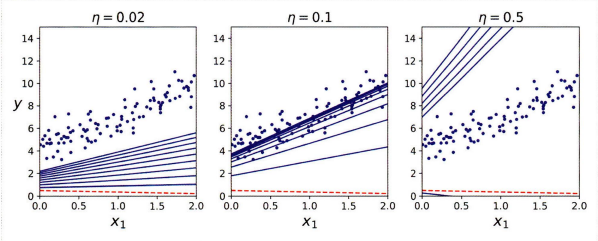

- 여러 가지 학습률에 대한 경사 하강법
 => 왼쪽은 학습률이 너무 낮고, 오른쪽은 학습률이 너무 높음. 적정한 학습률을 찾아야함 -> 그리드 탐색 사용

- 그리드 탐색 : 반복 횟수 크게 지정, 그레이디언트 벡터 작게 지정 -> 알고리즘 중지

## 4.2.2 확률적 경사 하강법

- 확률적 경사 하강법 : 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를
계산
 - 장점 : 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠름.  
 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
 - 단점 : 확률적 (즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정.

In [ ]:
n_epochs=50 # 반복 횟수
t0,t1=5,50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

In [ ]:
theta

array([[4.03301935],
       [2.86760271]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

- max_iter=1000 : 최대 1000번 에포크 동안 실행
- tol=1e-3 : 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행
- penalty=None : 규제 사용 X

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.01820374]), array([2.79536232]))

- 정규방정식으로 구한 것과 매우 비슷한 값을 얻음

# 4.2.3 미니배치 경사 하강법

- 미니배치 경사 하강법 : 각 스텝에서 전체 훈련 세트(배치 경사하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
 - 장점 : 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임

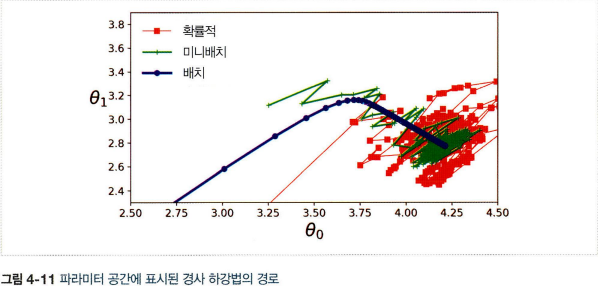

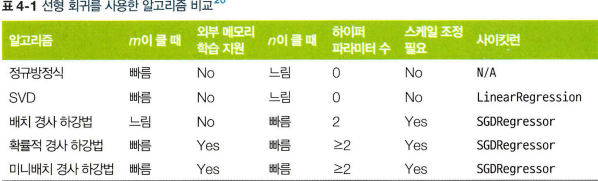

# 4.3 다항 회귀

- 다항 회귀 : 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법

(아래 예시) 간단한 2차방정식으로 비선형 데이터 생성

In [ ]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

- 사이킷런의 PolynomialFeatures 사용해 훈련 데이터 변환
- 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-2.43840337])

In [ ]:
X_poly[0]

array([-2.43840337,  5.945811  ])

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17310907]), array([[1.01790686, 0.49274807]]))

- 확장된 훈련 데이터에 LinearRegression 적용

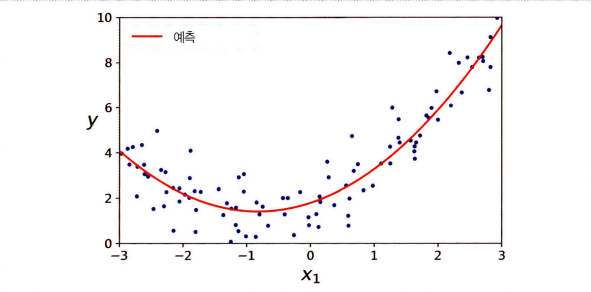

# 4.4 학습 곡선

- 모델의 일반화 성능 추정위해 사용
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 그래프 생성을 위해서 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),"r+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

- 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의

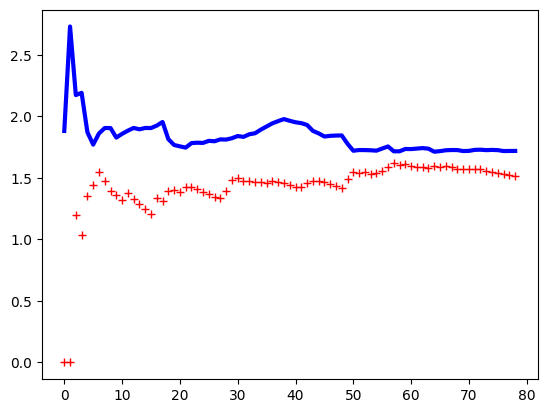

In [ ]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

1. 훈련 데이터
- 그래프가 0에서 시작 -> 훈련 세트에 1혹은 2개의 샘플이 있을 땐 모델 완벽하게 작동
- 하지만 샘플이 추가되면서 모델이 훈련 데이터를 완벽히 학습하기 불가능


2. 검증 데이터
- 초기 오차는 매우 큼 -> 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 불가능
- 샘플이 추가됨에 따라 학습이 되고 검증 오차 천천히 감소

- (아래) 10차 다항 회귀 모델의 학습 곡선

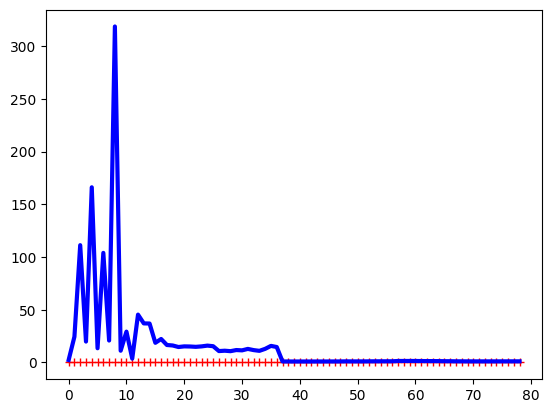

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)

(이전 그래프와의 차이점)
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간이 존재. -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낮다(과대적합 모델의 특징)
- 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

## ***편향/분산 트레이드오프 ***

- 편향 : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어 데이터가 실제로는 2차인데 선 형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽움

- 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 자유도가 높은 모델(예를 들면 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음.

- 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생. 이 오차를 줄일 수
있는 유일한 방법은 데이터에서 잡음을 제거하는 것(예를 들어 고장 난 센서 같은 데이터 소스를 고치거나 이상치를 감지해 제거)